### **Chapter 5: Image Enhancement Using Derivatives**

#### Giải bài tập Ex. 9:  Implement Marr and Hildreth's zero-crossing algorithm for edge detection with LoG.
Bài toán yêu cầu triển khai thuật toán phát hiện biên cạnh dựa trên phương pháp Marr và Hildreth sử dụng zero-crossing kết hợp với Laplacian of Gaussian (LoG).

---

#### 1. Import các thư viện cần thiết

In [ ]:
# type: ignore
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

#### 2. Xây dựng một số hàm phụ

In [2]:
def any_neighbor_zero(img, i, j):
    for k in range(-1, 2):  # Duyệt qua các hàng lân cận (-1, 0, 1)
        for l in range(-1, 2):  # Duyệt qua các cột lân cận (-1, 0, 1)
            if img[i + k, j + l] == 0:  # Kiểm tra nếu giá trị pixel là 0
                return True
    return False

- Hàm any_neighbor_zero() sử dụng trong việc phát hiện điểm cắt qua 0 (zero-crossing) trong ảnh. Khi áp dụng bộ lọc Laplacian of Gaussian (LoG), các điểm cắt qua 0 sẽ là các biên trong ảnh, và hàm này giúp kiểm tra xem một điểm có nằm trong vùng biên không.

In [3]:
def zero_crossing(img):
    img[img > 0] = 1
    img[img < 0] = 0
    out_img = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if img[i,j] > 0 and any_neighbor_zero(img, i, j):
                out_img[i,j] = 255
    return out_img

- Hàm zero_crossing() giúp phát hiện các điểm biên trong ảnh bằng cách sử dụng kỹ thuật zero-crossing, trong đó điểm biên là nơi giá trị của ảnh chuyển từ dương sang âm (hoặc ngược lại). Ảnh sau khi qua bộ lọc Laplacian of Gaussian (LoG) có thể có các giá trị dương và âm, hàm này giúp chỉ ra các biên (nơi sự chuyển đổi này xảy ra).

#### 3. Đọc ảnh

0.9206827450980393


Text(0.5, 1.0, 'Original Image')

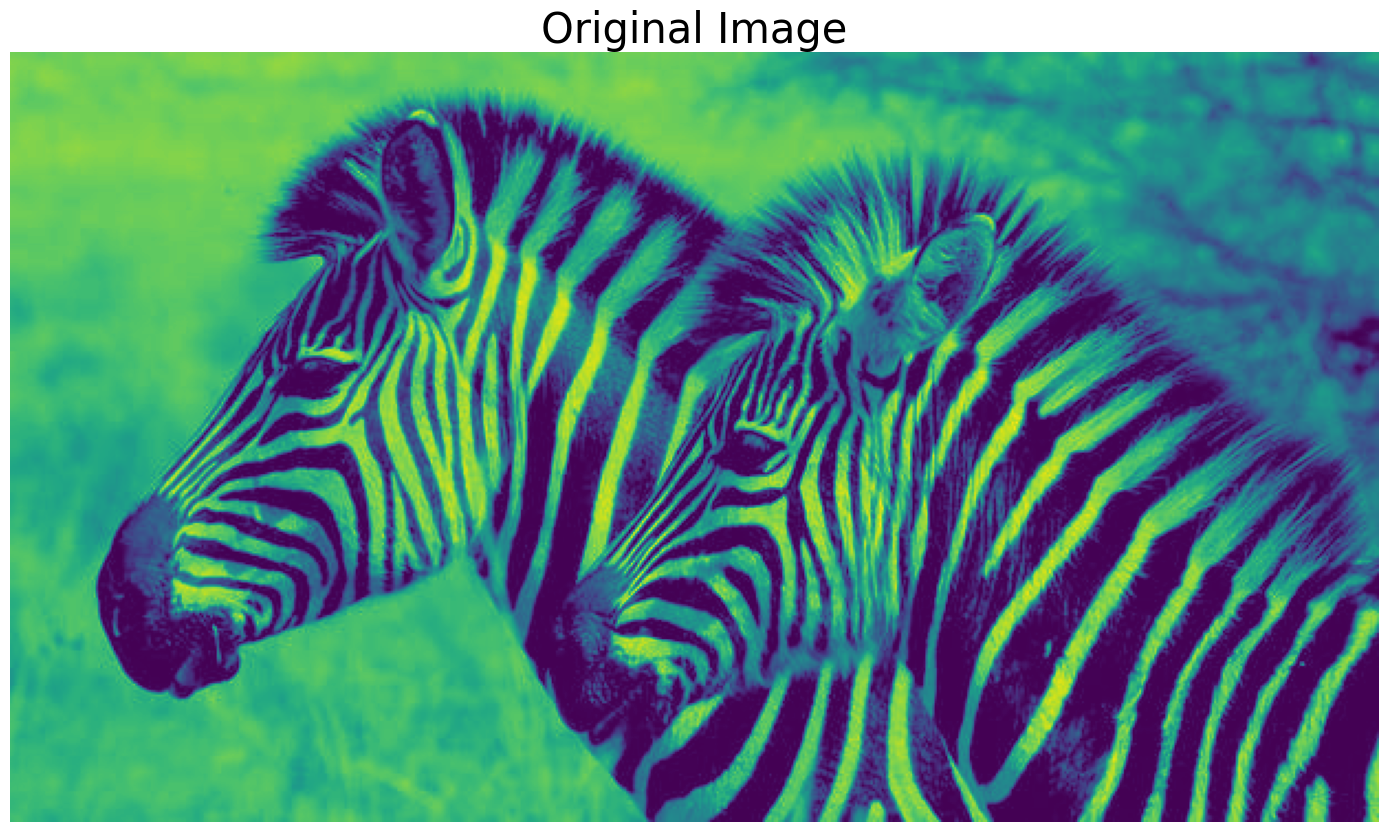

In [ ]:
img = rgb2gray(imread('input/zebras.jpg'))
print(np.max(img)) # in ra giá trị lớn nhất trong mảng
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image', size=30)

- imread đọc ảnh, rgb2gray chuyển ảnh màu sang ảnh xám.
- print(np.max(img)): In ra giá trị lớn nhất trong ảnh grayscale (0 đến 1 nếu ảnh đã được chuẩn hóa).
- plt.figure(figsize=(20,10)): Tạo một figure mới với kích thước là 20x10 inch.
- plt.imshow(img): Hiển thị ảnh grayscale.
- plt.axis('off'): Tắt hiển thị các trục (axes).
- plt.title('Original Image', size=30): Thêm tiêu đề cho ảnh là 'Original Image' với kích thước chữ 30.

#### 4. Áp dụng bộ lọc Laplacian of Gaussian (LoG)

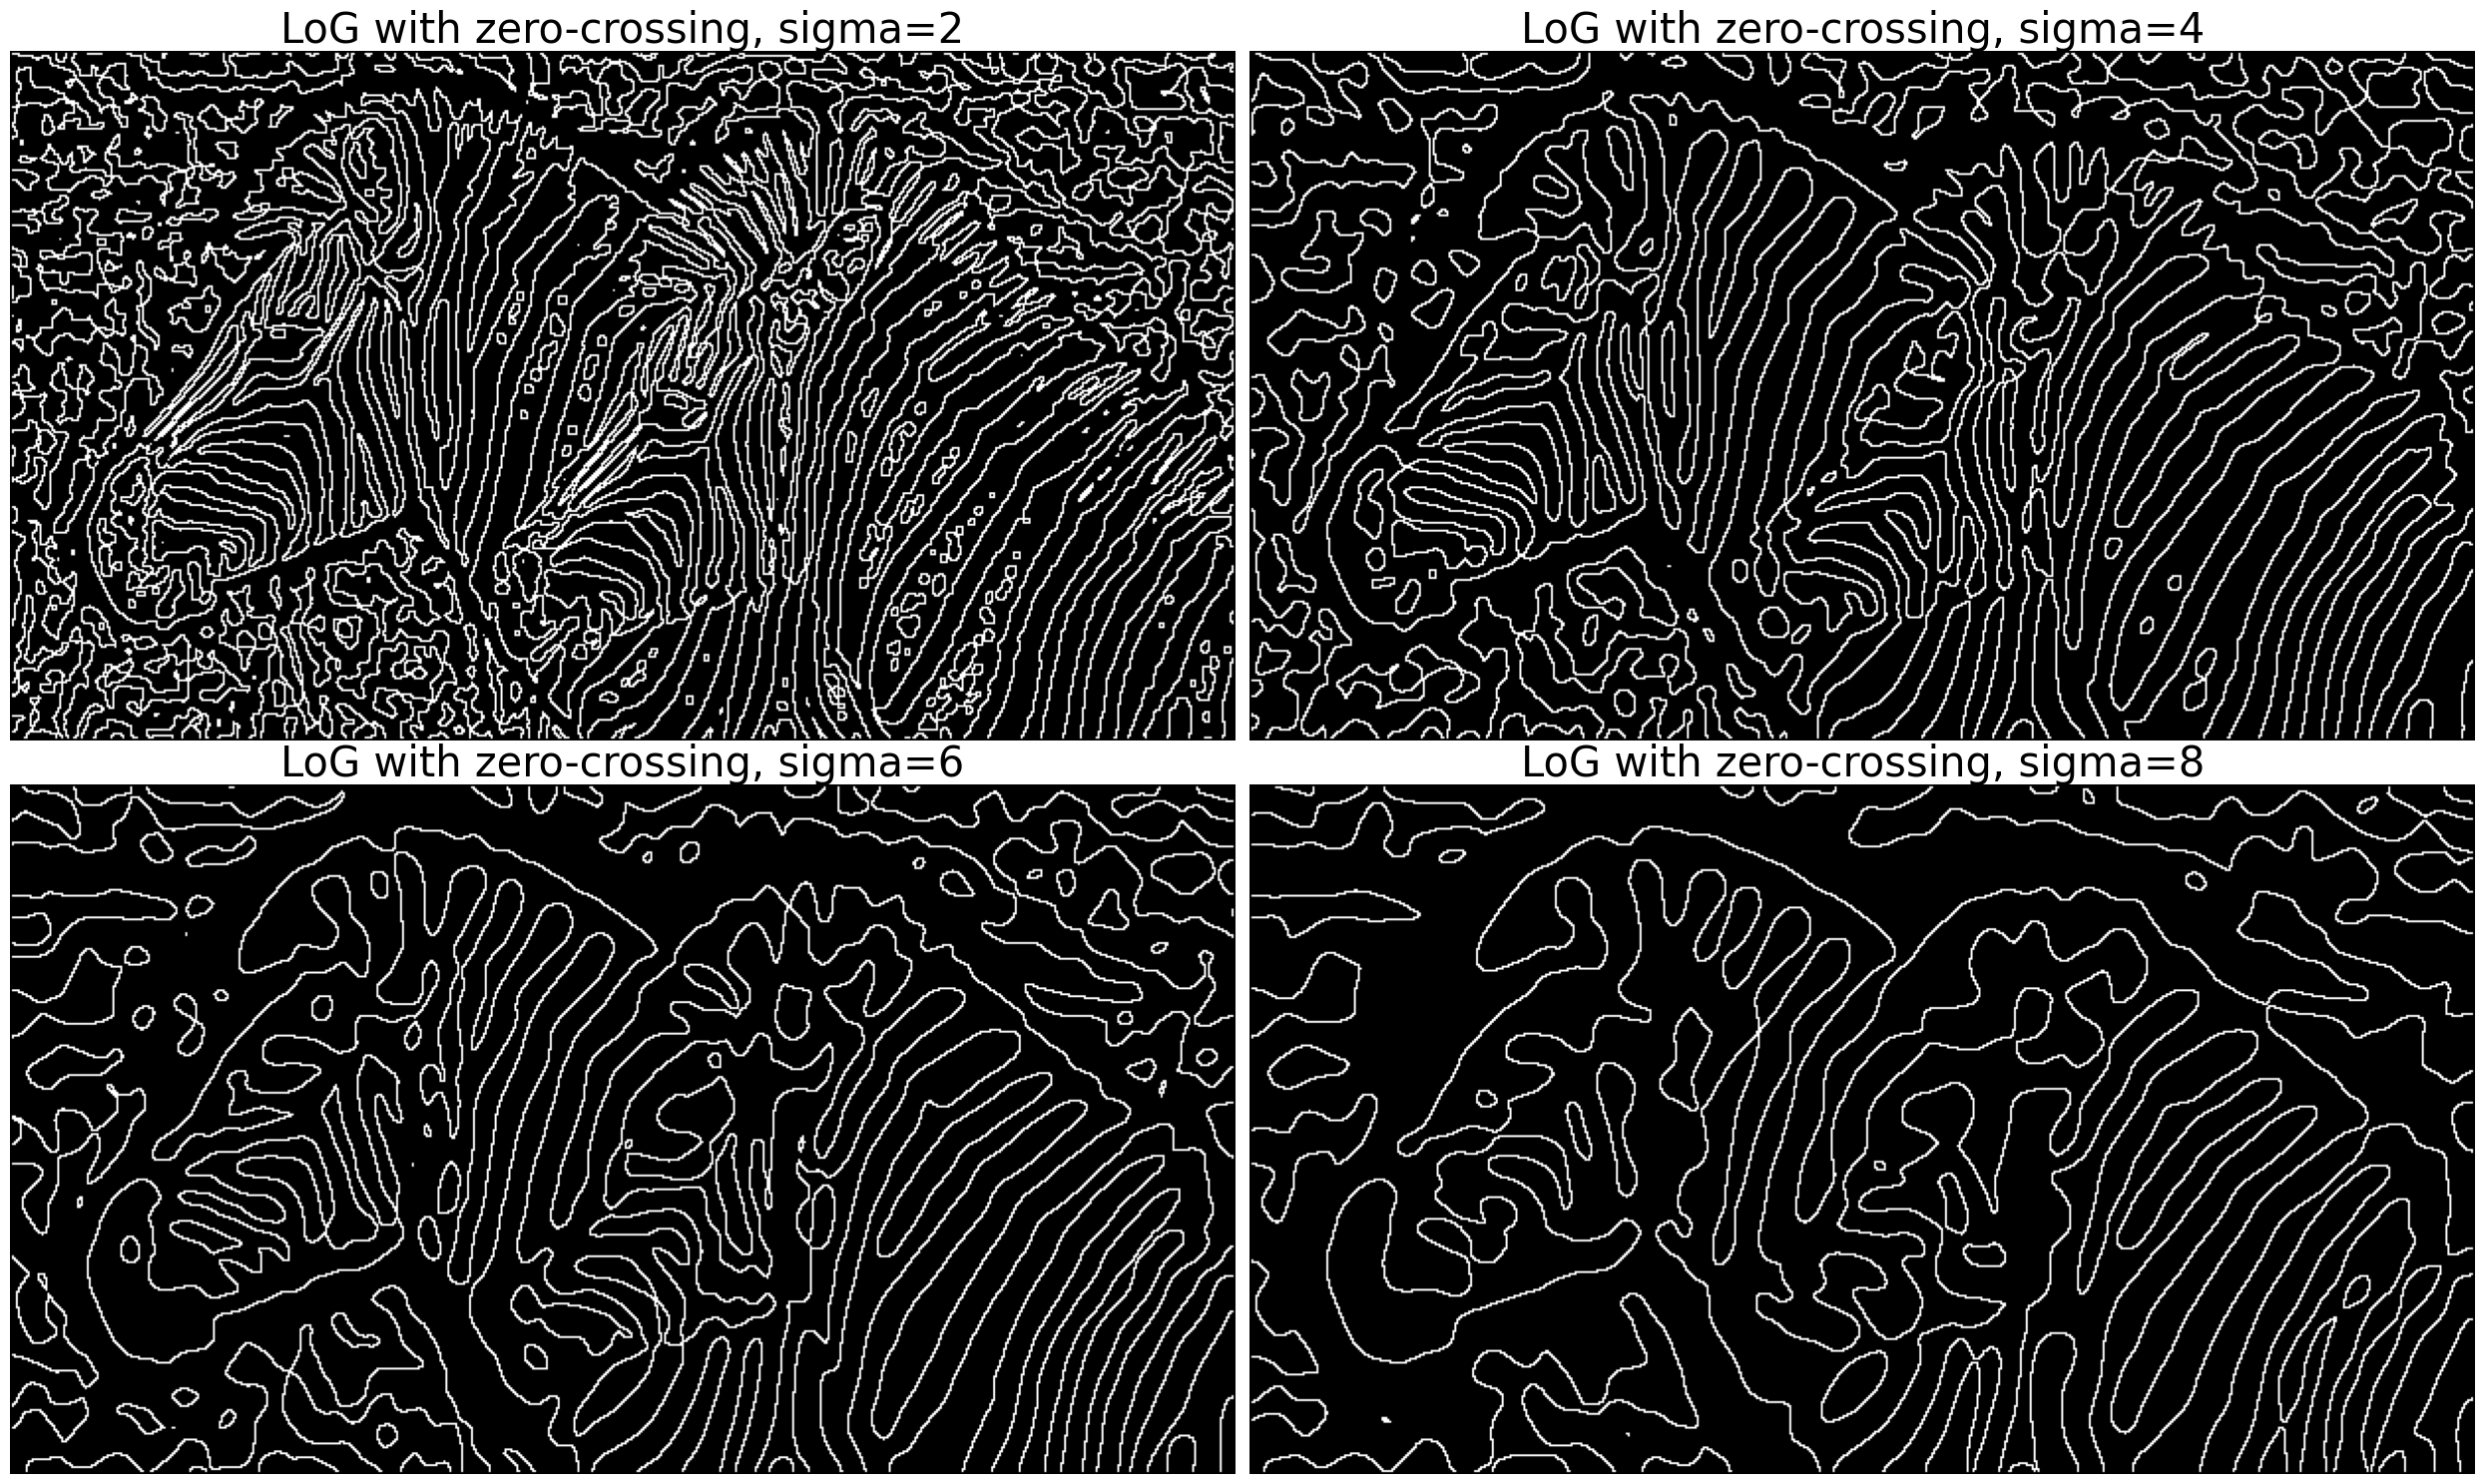

In [5]:
fig = plt.figure(figsize=(25,15))
plt.gray() # show the filtered result in grayscale
for sigma in range(2, 10, 2):
    plt.subplot(2, 2, sigma//2)
    result = ndimage.gaussian_laplace(img, sigma=sigma)
    result = zero_crossing(result)
    plt.imshow(result)
    plt.axis('off')
    plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30)

plt.tight_layout()
plt.show()

- fig = plt.figure(figsize=(25,15)): Tạo một figure mới có kích thước 25x15 inch.
- plt.gray(): Thiết lập màu sắc cho ảnh hiển thị là grayscale.
- Vòng lặp for sigma in range(2,10, 2) duyệt qua các giá trị sigma từ 2 đến 8 với bước nhảy là 2. Đây là các giá trị chuẩn độ cho bộ lọc Gaussian.
    - ndimage.gaussian_laplace(img, sigma=sigma): Áp dụng bộ lọc Laplace với bộ lọc Gaussian, sử dụng sigma làm tham số độ rộng của bộ lọc.
    - result = zero_crossing(result): Sau khi áp dụng bộ lọc Laplace, sử dụng hàm zero_crossing để xử lý ảnh theo cách zero-crossing.
    - plt.subplot(2,2,sigma/2): Tạo một subplot trong 2x2 grid để hiển thị kết quả cho từng giá trị sigma.
    - plt.imshow(result): Hiển thị ảnh kết quả.
    - plt.axis('off'): Tắt các trục hiển thị.
    - plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30): Đặt tiêu đề cho mỗi subplot, hiển thị giá trị sigma.
- plt.tight_layout(): Tự động căn chỉnh các subplot sao cho không bị trùng lặp và có đủ không gian giữa chúng.
- plt.show(): Hiển thị các biểu đồ đã tạo ra.